# Team 8
### Tianyu Wang, Mingzhuo Yu, Yongji Shen, Yangyang Zhang


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

def findCategoricalCol(df):
    cols=[]
    for col in df.columns:
        if df[col].dtype == object:
            cols.append(col)
    return cols

/kaggle/input/h-1b-visa/h1b_kaggle.csv


In [2]:
h1b_data = pd.read_csv('/kaggle/input/h-1b-visa/h1b_kaggle.csv')
h1b_data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [3]:
len(h1b_data)

3002458

In [4]:
h1b_data.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [5]:
h1b_data=h1b_data.drop('Unnamed: 0',axis=1)

h1b_data

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...
3002453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


# Exploratory Data Analysis

In [6]:
h1b_data['CASE_STATUS'].value_counts(dropna=False)

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
NaN                                                        13
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [7]:
h1b_data.loc[h1b_data['CASE_STATUS'] == 'REJECTED', 'CASE_STATUS'] = 'DENIED'
h1b_data.loc[h1b_data['CASE_STATUS'] == 'INVALIDATED', 'CASE_STATUS'] = 'DENIED'
h1b_data.loc[h1b_data['CASE_STATUS'] == 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'CASE_STATUS'] = 'DENIED'
h1b_data.loc[h1b_data['CASE_STATUS'] == 'CERTIFIED-WITHDRAWN', 'CASE_STATUS'] = 'CERTIFIED'
h1b_data = h1b_data.drop(h1b_data[h1b_data['CASE_STATUS']=='WITHDRAWN'].index)

In [8]:
h1b_data['CASE_STATUS'].value_counts(dropna=False)

CERTIFIED    2818282
DENIED         94364
NaN               13
Name: CASE_STATUS, dtype: int64

In [9]:
#removing the case_status null values as a very small percentage of data having null
h1b_data = h1b_data.drop(h1b_data[h1b_data['CASE_STATUS'].isnull()].index)

In [10]:
h1b_data['CASE_STATUS'].value_counts(dropna=False)

CERTIFIED    2818282
DENIED         94364
Name: CASE_STATUS, dtype: int64

In [11]:
h1b_data.isnull().sum()

CASE_STATUS                0
EMPLOYER_NAME             18
SOC_NAME               17073
JOB_TITLE                 10
FULL_TIME_POSITION         1
PREVAILING_WAGE           53
YEAR                       0
WORKSITE                   0
lon                   102844
lat                   102844
dtype: int64

In [12]:
h1b_data['PREVAILING_WAGE'].describe()

count    2.912593e+06
mean     1.428910e+05
std      5.282312e+06
min      0.000000e+00
25%      5.441300e+04
50%      6.500000e+04
75%      8.143200e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b3f2a5210>]],
      dtype=object)

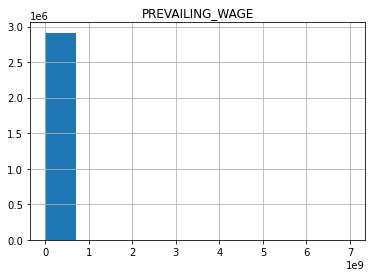

In [14]:
wage_median = h1b_data['PREVAILING_WAGE'].median()
h1b_data['PREVAILING_WAGE'] =  h1b_data['PREVAILING_WAGE'].fillna(wage_median)
h1b_data[['PREVAILING_WAGE']].hist()

In [15]:
lower_bound = h1b_data['PREVAILING_WAGE'].quantile(0.05)
higher_bound = h1b_data['PREVAILING_WAGE'].quantile(0.95)
h1b_data['FULL_TIME_POSITION'] =h1b_data['FULL_TIME_POSITION'].fillna(h1b_data['FULL_TIME_POSITION'].mode()[0])
h1b_data['EMPLOYER_NAME'] =  h1b_data['EMPLOYER_NAME'].fillna(h1b_data['EMPLOYER_NAME'].mode()[0])
h1b_data['JOB_TITLE'] = h1b_data['JOB_TITLE'].fillna(h1b_data['JOB_TITLE'].mode()[0])
h1b_data = h1b_data.drop(['lon','lat'],axis=1) #to check this need the expert knowledge of the area, hence dropping
h1b_data

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
5,CERTIFIED,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA"
...,...,...,...,...,...,...,...,...
3002369,DENIED,"CUSTOMTBT, LLC",Instructional Coordinators,SENIOR INSTRUCTIONAL DESIGNER,Y,46738.0,2011.0,"MARIETTA, GEORGIA"
3002378,DENIED,"KEVIN PARK & ASSOCIATES, LTD",Accountants and Auditors,ACCOUNTANT,Y,45760.0,2011.0,"ARLINGTON HEIGHTS, ILLINOIS"
3002383,DENIED,IVERTIX INCORPORATED,Computer Programmers,APPLICATION DEVELOPER,Y,54080.0,2011.0,"WASHINGTON, DISTRICT OF COLUMBIA"
3002389,DENIED,"PROGRESSIVE SURFACE, INC.",Sales Engineers,SALES ENGINEER,Y,55141.0,2011.0,"GRAND RAPIDS, MICHIGAN"


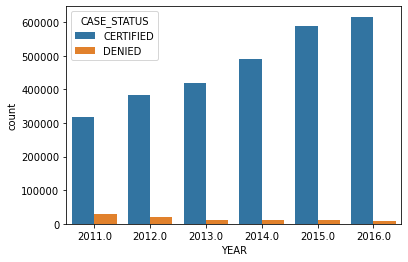

In [16]:
sns.countplot('YEAR',data=h1b_data,hue='CASE_STATUS')

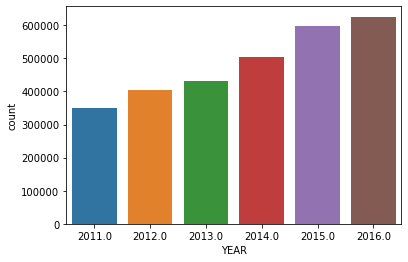

In [17]:
sns.countplot('YEAR',data=h1b_data)

In [19]:
h1b_data['SOC_NAME'] = h1b_data['SOC_NAME'].fillna(h1b_data['SOC_NAME'].mode()[0])
h1b_data.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64

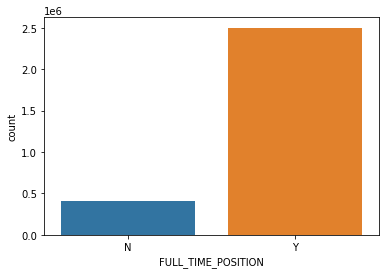

In [20]:
sns.countplot('FULL_TIME_POSITION',data=h1b_data)

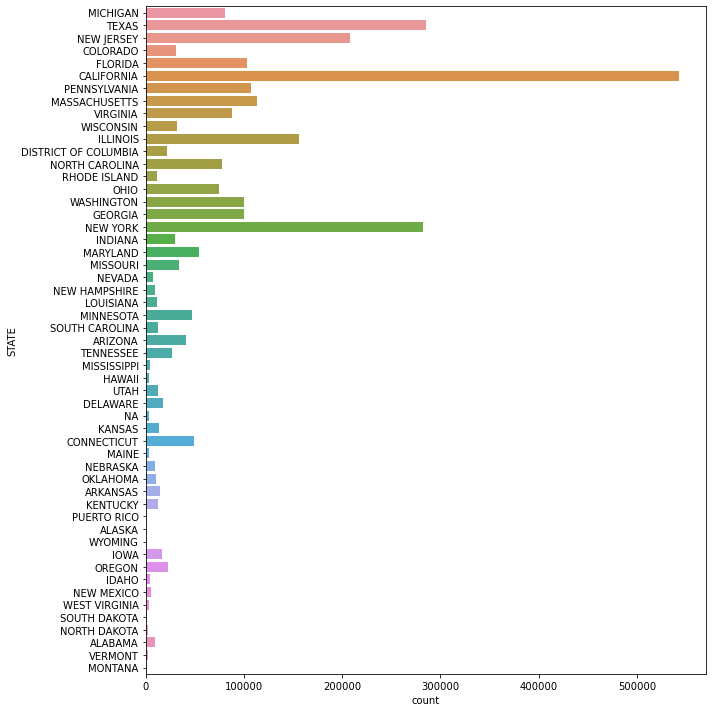

In [21]:
h1b_data['STATE'] = h1b_data['WORKSITE'].apply(lambda x: x.split(', ')[1])
plt.figure(figsize=(10,10))
sns.countplot(y=h1b_data['STATE'])
plt.tight_layout()

In [22]:
h1b_data['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                      130335
TATA CONSULTANCY SERVICES LIMITED     64418
WIPRO LIMITED                         47497
DELOITTE CONSULTING LLP               36675
ACCENTURE LLP                         33316
                                      ...  
RX AUTOMATION SOLUTIONS, INC.             1
PHENIX BICOASTAL SALONS, LLC              1
US CHINA BUSINES SOLUTIONS, INC.          1
NEXLA INC.                                1
GOLD BIODYNAMICS, INC.                    1
Name: EMPLOYER_NAME, Length: 234089, dtype: int64

In [23]:
h1b_data[h1b_data['EMPLOYER_NAME'].str.contains('UNIVERSITY')]

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE
0,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",MICHIGAN
23,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.0,2016.0,"CHULA VISTA, CALIFORNIA",CALIFORNIA
74,CERTIFIED,UNIVERSITY AT ALBANY,CHIEF EXECUTIVES,DIRECTOR,Y,75293.0,2016.0,"ALBANY, NEW YORK",NEW YORK
298,CERTIFIED,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",CHIEF EXECUTIVES,ASSO. VICE CHANCELLOR FOR INTEL. PROP. AND IND...,Y,91312.0,2016.0,"LOS ANGELES, CALIFORNIA",CALIFORNIA
300,CERTIFIED,YALE UNIVERSITY,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,195208.0,2016.0,"NEW HAVEN, CONNECTICUT",CONNECTICUT
...,...,...,...,...,...,...,...,...,...
3002264,CERTIFIED,CARNEGIE MELLON UNIVERSITY,"Physical Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,Y,41330.0,2011.0,"PITTSBURGH, PENNSYLVANIA",PENNSYLVANIA
3002270,CERTIFIED,"UNIVERSITY OF CALIFORNIA, LOS ANGELES","Medical Scientists, Except Epidemiologists",POSTDOCTORAL SCHOLAR,Y,42864.0,2011.0,"LOS ANGELES, CALIFORNIA",CALIFORNIA
3002278,CERTIFIED,RESEARCH CORPORATION OF THE UNIVERSITY OF HAWAII,Biological Technicians,DNA LAB TECHNICIAN,Y,28080.0,2011.0,"HILO, HAWAII",HAWAII
3002364,DENIED,"UNIVERSITY OF CALIFORNIA, SANTA CRUZ",Biochemists and Biophysicists,POSTDOCTORAL SCHOLAR,Y,38496.0,2011.0,"SANTA CRUZ, CALIFORNIA",CALIFORNIA


In [24]:
h1b_data[~h1b_data['EMPLOYER_NAME'].str.contains('UNIVERSITY')]

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,STATE
1,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",TEXAS
2,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",NEW JERSEY
3,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",COLORADO
5,CERTIFIED,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA",FLORIDA
6,CERTIFIED,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.0,2016.0,"HOUSTON, TEXAS",TEXAS
...,...,...,...,...,...,...,...,...,...
3002369,DENIED,"CUSTOMTBT, LLC",Instructional Coordinators,SENIOR INSTRUCTIONAL DESIGNER,Y,46738.0,2011.0,"MARIETTA, GEORGIA",GEORGIA
3002378,DENIED,"KEVIN PARK & ASSOCIATES, LTD",Accountants and Auditors,ACCOUNTANT,Y,45760.0,2011.0,"ARLINGTON HEIGHTS, ILLINOIS",ILLINOIS
3002383,DENIED,IVERTIX INCORPORATED,Computer Programmers,APPLICATION DEVELOPER,Y,54080.0,2011.0,"WASHINGTON, DISTRICT OF COLUMBIA",DISTRICT OF COLUMBIA
3002389,DENIED,"PROGRESSIVE SURFACE, INC.",Sales Engineers,SALES ENGINEER,Y,55141.0,2011.0,"GRAND RAPIDS, MICHIGAN",MICHIGAN


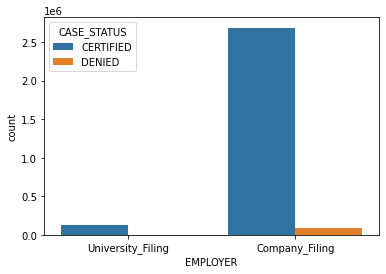

In [25]:
#2 categories can be formed - University_Filing and Company_Filing
h1b_data['EMPLOYER_NAME'] = h1b_data['EMPLOYER_NAME'].apply(lambda x: x.lower())
h1b_data["EMPLOYER"] = h1b_data['EMPLOYER_NAME'].apply(lambda x : 'University_Filing' if 'university' in x else 'Company_Filing')
sns.countplot('EMPLOYER',data=h1b_data,hue='CASE_STATUS')

In [26]:
h1b_data.groupby('EMPLOYER')['CASE_STATUS'].value_counts(normalize=True)

EMPLOYER           CASE_STATUS
Company_Filing     CERTIFIED      0.967384
                   DENIED         0.032616
University_Filing  CERTIFIED      0.972018
                   DENIED         0.027982
Name: CASE_STATUS, dtype: float64

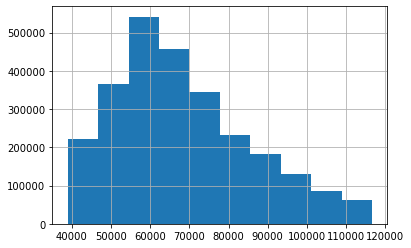

In [27]:
#Removal of the outliers from the wage column.
h1b_data = h1b_data[(h1b_data['PREVAILING_WAGE']>lower_bound ) & (h1b_data['PREVAILING_WAGE'] < higher_bound)]
h1b_data['PREVAILING_WAGE'].hist()

In [28]:
h1b_data['CASE_STATUS'].value_counts(normalize=True)

CERTIFIED    0.971763
DENIED       0.028237
Name: CASE_STATUS, dtype: float64

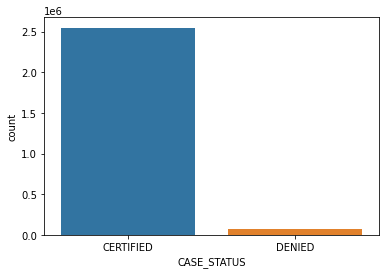

In [29]:
sns.countplot('CASE_STATUS',data=h1b_data)

In [30]:
h1b_data.SOC_NAME.value_counts()

Computer Systems Analysts                   299583
Computer Programmers                        217215
COMPUTER SYSTEMS ANALYSTS                   206138
SOFTWARE DEVELOPERS, APPLICATIONS           195451
Software Developers, Applications           177766
                                             ...  
BUSINESS INTELLIGENCE ANAYLSTS                   1
SHIP ENGINEERS                                   1
FINANCIAL MANAGERS, BRANCH OR DEPARTMENT         1
COMMERCIAL & INDUSTRIAL DESIGNERS                1
ARCHITECTURAL AND ENGINEERS MANAGERS             1
Name: SOC_NAME, Length: 1805, dtype: int64

In [31]:
h1b_data['SOC_NAME']=h1b_data['SOC_NAME'].apply(lambda x:x.lower())
h1b_data['SECTOR'] = np.nan
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('computer','programmer')] = 'computer'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('software','web developer')] = 'computer'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('database')] = 'computer'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('math','statistic')] = 'Mathematical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('predictive model','stats')] = 'Mathematical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('teacher','linguist')] = 'Education'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('professor','Teach')] = 'Education'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('school principal')] = 'Education'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('medical','doctor')] = 'Medical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('physician','dentist')] = 'Medical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('Health','Physical Therapists')] = 'Medical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('surgeon','nurse')] = 'Medical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('psychiatr')] = 'Medical'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('chemist','physicist')] = 'Advance Sciences'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('biology','scientist')] = 'Advance Sciences'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('biologi','clinical research')] = 'Advance Sciences'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('public relation','manage')] = 'Management'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('management','operation')] = 'Management'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('chief','plan')] = 'Management'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('executive')] = 'Management'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('advertis','marketing')] = 'Marketing'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('promotion','market research')] = 'Marketing'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('business','business analyst')] = 'Business'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('business systems analyst')] = 'Business'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('accountant','finance')] = 'Financial'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('financial')] = 'Financial'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('engineer','architect')] = 'Architecture & Engineering'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('surveyor','carto')] = 'Architecture & Engineering'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('technician','drafter')] = 'Architecture & Engineering'
h1b_data.SECTOR[h1b_data['SOC_NAME'].str.contains('information security','information tech')] = 'Architecture & Engineering'
h1b_data.SECTOR = h1b_data.SECTOR.replace(np.NaN,'Others')

In [32]:
h1b_data.SECTOR.value_counts(dropna=False)

computer                      1667385
Others                         338356
Architecture & Engineering     277003
Financial                      113184
Management                      68342
Medical                         50821
Education                       49974
Advance Sciences                37596
Business                        13233
Marketing                        2256
Mathematical                     1886
Name: SECTOR, dtype: int64

In [33]:
#Too many uniques values to be processed and the sector column would suffice for the Job title columns, hence can be dropped
h1b_data.dtypes

CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
STATE                  object
EMPLOYER               object
SECTOR                 object
dtype: object

In [34]:
h1b_data = h1b_data.drop(['EMPLOYER_NAME','JOB_TITLE','WORKSITE','SOC_NAME'],axis=1)
h1b_data.dtypes

CASE_STATUS            object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
STATE                  object
EMPLOYER               object
SECTOR                 object
dtype: object

In [35]:
categorical_var = findCategoricalCol(h1b_data)
categorical_var

['CASE_STATUS', 'FULL_TIME_POSITION', 'STATE', 'EMPLOYER', 'SECTOR']

In [36]:
dummy = pd.get_dummies(h1b_data[categorical_var], drop_first=True)
h1b_data_df = pd.concat([h1b_data.drop(categorical_var,axis=1),dummy],axis=1)

# Under Sampling for Imbalanced Dataset

In [37]:
from imblearn.under_sampling import NearMiss
X = h1b_data_df.drop('CASE_STATUS_DENIED',axis=1)
y = h1b_data_df['CASE_STATUS_DENIED']

In [38]:
nm = NearMiss()
X_samp,y_samp = nm.fit_sample(X,y)

In [39]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_samp)))

Original dataset shape Counter({0: 2546055, 1: 73981})
Resampled dataset shape Counter({0: 73981, 1: 73981})


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.3, random_state=42)

# Model Creation

## 1. RandomForestClassifier

In [42]:
param_grid = { 
    'n_estimators': [300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rc =RandomForestClassifier(random_state=42)
gcv = GridSearchCV(estimator=rc, param_grid=param_grid, cv=7,verbose=1, n_jobs=-1)
gcv.fit(X_train,y_train)

Fitting 7 folds for each of 12 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 24.6min finished


GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 400]},
             verbose=1)

In [43]:
print(gcv.best_params_)

predictions =gcv.predict(X_test)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 400}


In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print('<==========Classification Report ========>')
print(classification_report(y_test, predictions))
print('<==========Confusion Matrix ========>')
print(confusion_matrix(y_test,predictions))

<==========Classification Report ========>
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22199
           1       1.00      0.98      0.99     22190

    accuracy                           0.99     44389
   macro avg       0.99      0.99      0.99     44389
weighted avg       0.99      0.99      0.99     44389

<==========Confusion Matrix ========>
[[22143    56]
 [  392 21798]]


In [45]:
print("Training Accuracy:{:.2f}%".format(gcv.score(X_train,y_train)*100))
print("Testing Accuracy:{:.2f}%".format(gcv.score(X_test,y_test)*100))

Training Accuracy:99.14%
Testing Accuracy:98.99%


## 2. Logistic Regression

In [46]:
param_log_grid = {
    'C' :[0.01,0.1,1],
    'solver' :['liblinear']
}

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
lr = LogisticRegression(random_state=42)
skf = StratifiedKFold(n_splits=5,random_state=42)
gcv_log = GridSearchCV(estimator=lr, param_grid=param_log_grid, cv=skf, verbose=1, n_jobs=-1)
gcv_log.fit(X_train,y_train)
print(gcv_log.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.5s finished


{'C': 0.1, 'solver': 'liblinear'}


In [47]:
print("Training Accuracy {:.2f}%".format(gcv_log.score(X_train,y_train)*100))
print("Test Accuracy {:.2f}%".format(gcv_log.score(X_test,y_test)*100))

Training Accuracy 87.35%
Test Accuracy 87.48%


In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
classifiers = [RandomForestClassifier(random_state=42,criterion='gini',max_features='auto',n_estimators=400),
              LogisticRegression(random_state=42, C=1,solver='liblinear')]

In [49]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':classifier.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [50]:
result_table = result_table.set_index('classifiers')
result_table.index.tolist()

['RandomForestClassifier', 'LogisticRegression']

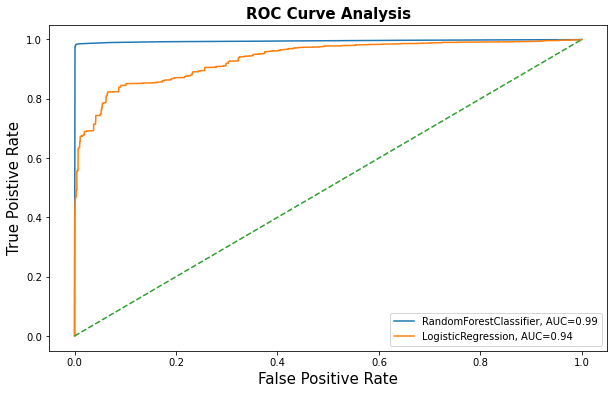

In [51]:
plt.figure(figsize=(10,6))
for model in result_table.index.tolist():
    plt.plot(result_table.loc[model]['fpr'],
             result_table.loc[model]['tpr'],
             label= '{}, AUC={:.2f}'.format(model, result_table.loc[model]['auc']))
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Poistive Rate', fontsize =15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend()